## Algorithm Overview

In this analysis, we start with **Logistic Regression**

### Why Logistic Regression?

- **Baseline Model**: Logistic regression provides a straightforward and reliable benchmark to compare against more complex algorithms. Establishing this baseline helps assess the value added by additional complexity in subsequent models.
  
- **Simplicity and Interpretability**: Logistic regression is highly interpretable, offering clear insights into the relationship between input features and the target variable. This is especially valuable in domains like healthcare, where transparency in decision-making is critical.

- **Efficiency**: The algorithm is computationally efficient, enabling quick experimentation and iteration without heavy resource requirements.

### Limitations of Logistic Regression:

While logistic regression is a powerful tool for linear decision boundaries, it has inherent limitations:
- **Non-Linearity**: It struggles to capture non-linear relationships between features and the target variable.
- **Feature Interactions**: Complex interactions among features may go unnoticed.
- **High-Dimensional Data**: It may underperform in datasets with high-dimensional or highly correlated features.

### Progression to Advanced Models:

Recognizing these limitations, logistic regression serves as a stepping stone toward more sophisticated algorithms that address these challenges. Examples include:
- **Decision Trees and Random Forests**: Handle non-linear relationships and provide feature importance insights.
- **Neural Networks**: Excel at learning complex patterns in high-dimensional data.
- **Gradient Boosting Machines (GBMs)**: Offer superior performance in handling imbalanced data and optimizing on various loss functions.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [27]:
train_data = pd.read_csv('Final_Version_data_breast.csv')
test_data = pd.read_csv('Test_Set.csv')

X_train = train_data.drop('cancer_type', axis=1)
y_train = train_data['cancer_type']

X_test = test_data.drop('cancer_type', axis=1)
y_test = test_data['cancer_type']

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

f1 = f1_score(y_test, y_pred, average='weighted')
print("\nF1 Score:")
print(f1)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[117  61  55  26]
 [ 23 130  41  31]
 [ 35  76  95  22]
 [  3  10   5 230]]

F1 Score:
0.5856267342125998

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.45      0.54       259
           1       0.47      0.58      0.52       225
           2       0.48      0.42      0.45       228
           3       0.74      0.93      0.83       248

    accuracy                           0.60       960
   macro avg       0.59      0.59      0.58       960
weighted avg       0.59      0.60      0.59       960



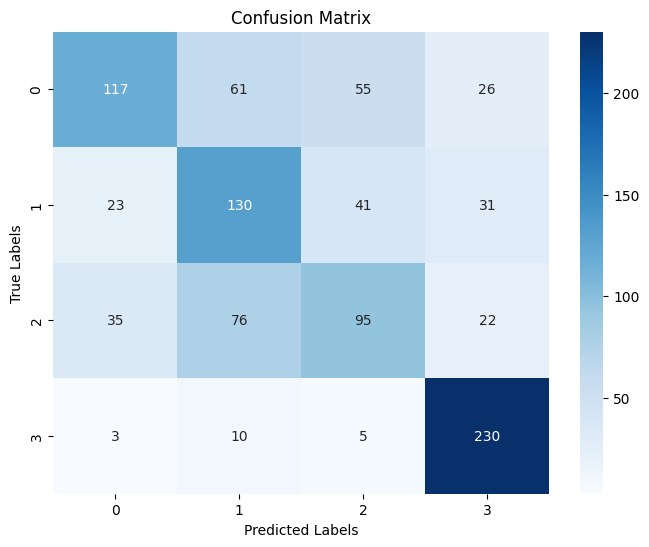

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


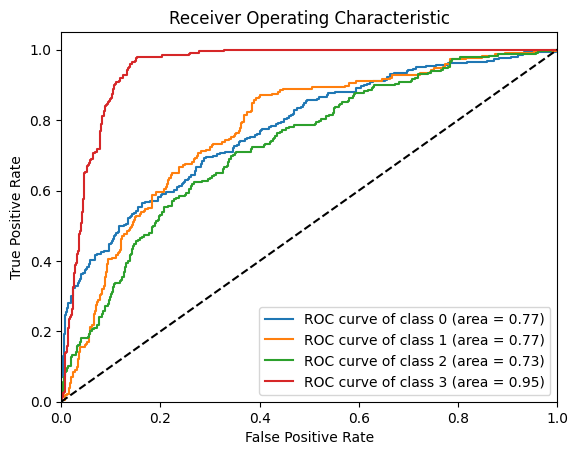

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize y_test for ROC curve plotting in multi-class setting
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust classes accordingly
y_pred_prob = logreg.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## ROC Curve Analysis and Model Evaluation

The ROC curves provide insights into the discriminative performance of our logistic regression model across different cancer types:

- **Class 0 (AUC = 0.78)** and **Class 1 (AUC = 0.77)**: These curves suggest moderate performance, indicating potential limitations in capturing the complexities or unique characteristics of these cancer types.
- **Class 2 (AUC = 0.73)**: This class shows the model's challenges in distinguishing it clearly from other categories, hinting at overlapping or ambiguous features.
- **Class 3 (AUC = 0.95)**: Excellent performance, demonstrating effective feature capture and strong separability from other classes.

### Implications for Model Improvement

The variation in AUC values across classes suggests that while logistic regression provides a useful baseline, its assumptions of linearity and feature independence might restrict its effectiveness, particularly for classes with more complex or non-linear relationships.

### Moving Forward with Advanced Models

Given the above analysis, there is a compelling need to explore more sophisticated models:
- **Decision Trees or Random Forests**: These might improve detection by modeling non-linear interactions without extensive feature engineering.
- **Neural Networks**: Could offer deeper insights through their layered structure, potentially enhancing classification accuracy.
- **Gradient Boosting Machines (GBMs)**: Their iterative correction approach might be particularly effective for classes that are currently underperforming.

Incorporating these advanced techniques could lead to significant improvements in model performance, especially for the more challenging classes, thus supporting a more robust predictive framework for cancer type classification.

